<a href="https://colab.research.google.com/github/Sertyron/AnalisisDeVideojuegosDeSteam/blob/main/13_12_2025_EntregaFinal_Alejandro_Garcia_AnalisisDeVideojuegosDeSteam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hipotesis del Analisis**

##Resumen
La industria de los videojuegos presenta un crecimiento sostenido y acelerado
año tras año, lo cual la posiciona como un sector de gran interés tanto a nivel económico como cultural. Actualmente, se trata de una de las formas de
entretenimiento más valoradas por los usuarios. Este proyecto se propone analizar la percepción de los videojuegos a lo largo del tiempo, utilizando como referencia una de las plataformas de distribución digital más importantes del medio: Steam.

El dataset seleccionado permite observar cuáles títulos han sido mejor valorados desde su lanzamiento, considerando tanto las reseñas generales como su evolución temporal.

##Objetivo del análisis
Se analizará un conjunto de videojuegos del catálogo de Steam, con el propósito de examinar cómo fueron valorados por los usuarios tanto en su lanzamiento como posteriormente, después de un mes.

El análisis tiene como objetivo identificar qué videojuegos logran mayor influencia sobre los usuarios, considerando variables como el género y el tipo de juego.

Asimismo, se busca comprender cómo se configura la valoración subjetiva del
usuario promedio a lo largo del tiempo, y si existen patrones comunes entre los títulos mejor valorados.

Armado asi un modelo de estudio del mercado para proximos proyectos y ver cuando con que generos ysobre todo a que valores los usuarios estan mas interesados

#Optencion de datos

In [1]:
#Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importar Todos los Data frame

# Este es el Data frame Original
!gdown 1wvT8HmcN_l-8hdctlmMKvQf_DyGFOzZm


Downloading...
From: https://drive.google.com/uc?id=1wvT8HmcN_l-8hdctlmMKvQf_DyGFOzZm
To: /content/Dataset_Steam Games_Limpio.xlsx
100% 7.08M/7.08M [00:00<00:00, 40.2MB/s]


In [3]:
#Este es el Data frame despues de la normalizacion de datos y el agregado de api
!gdown 1KXRFQG3NfnZlrC7xqb2Mf7SrB-YS-4JH

Downloading...
From: https://drive.google.com/uc?id=1KXRFQG3NfnZlrC7xqb2Mf7SrB-YS-4JH
To: /content/Data_Procesada_V1.xlsx
100% 7.87M/7.87M [00:00<00:00, 27.8MB/s]


In [4]:
#Este es el Data Frame despues de una limpieza mas especifica que se vera acontinuacion pero
#en resumen es la iteracion para empezar a armar modelos y y graficos
!gdown 1gQAt0Sdopzcqv2VuMDJWGuZ5sO8K699o

Downloading...
From: https://drive.google.com/uc?id=1gQAt0Sdopzcqv2VuMDJWGuZ5sO8K699o
To: /content/Data_Frame_V2.xlsx
100% 7.96M/7.96M [00:00<00:00, 48.1MB/s]


In [6]:
from google.colab import files
import io
import pandas as pd
#En caso de necesitar subir los archivos de forma manual dejare los archivos correspondientes


# Subir archivo(s)
uploaded = files.upload()  # esto abre el diálogo de subida

# Tomar el primer archivo subido (funciona aunque el nombre cambie)
filename = next(iter(uploaded))
print("Archivo subido (key):", filename)

# Cargar en DataFrame desde la bytes-representación
# Detectar si es un archivo Excel por la extensión y usar read_excel
if filename.endswith(('.xlsx', '.xls')):
    df = pd.read_excel(io.BytesIO(uploaded[filename]))
else:
    try:
        df = pd.read_csv(io.BytesIO(uploaded[filename]), low_memory=False)
    except UnicodeDecodeError:
        # si hay problemas de encoding intentamos latin1
        df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='latin1', low_memory=False)

print("Shape:", df.shape)
df.head()

Saving Data_Reseña2.xlsx to Data_Reseña2.xlsx
Archivo subido (key): Data_Reseña2.xlsx
Shape: (4955, 18)


recommendationid                                             author  \
0         208778276  {'steamid': '76561198769955331', 'num_games_ow...   
1         211640921  {'steamid': '76561198081237360', 'num_games_ow...   
2         211128320  {'steamid': '76561199251091395', 'num_games_ow...   
3         209783078  {'steamid': '76561199471545860', 'num_games_ow...   
4         208642194  {'steamid': '76561198770614871', 'num_games_ow...   

  language                                             review  \
0  english  Gambling simulator with cheaters and guns! Bes...   
1  english  Click heads = satisfying . \r\nClick anything ...   
2  english  gold gold gold!\ni love gambling but if i open...   
3  english  this game contains way too many stupid russian...   
4  english  Quotation forthcoming.\n\nEDIT:\n\nCounter-Str...   

   timestamp_created  timestamp_updated  voted_up  votes_up  votes_funny  \
0         1762666445         1763957182      True       485          135   
1         1764421285         1764421285      True        69           17   
2         1764240795         1764240795      True        47           11   
3         1763749266         1763749266      True        45            9   
4         1762533011         1764941428      True        19            0   

   weighted_vote_score  comment_count  steam_purchase  received_for_free  \
0             0.913510             23            True              False   
1             0.838050              9            True              False   
2             0.762419              9            True              False   
3             0.727317              0            True              False   
4             0.680331              1            True              False   

   written_during_early_access  primarily_steam_deck  appid  \
0                        False                 False    730   
1                        False                 False    730   
2                        False                 False    730   
3                        False                 False    730   
4                        False                 False    730   

   timestamp_dev_responded developer_response  
0                      NaN                NaN  
1                      NaN                NaN  
2                      NaN                NaN  
3                      NaN                NaN  
4                      NaN                NaN

In [7]:
#Asociar la ruta a una variable
df_procesado = pd.read_excel('/content/Data_Procesada_V1.xlsx')

In [8]:
#Asociar la ruta a una variable
df = pd.read_excel('/content/Dataset_Steam Games_Limpio.xlsx')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18377 entries, 0 to 18376
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Title                   18377 non-null  object        
 1   Original Price          18377 non-null  object        
 2   Discounted Price        18377 non-null  object        
 3   Release Date            18377 non-null  datetime64[ns]
 4   Link                    18377 non-null  object        
 5   Game Description        18376 non-null  object        
 6   Recent Reviews Summary  18377 non-null  object        
 7   All Reviews Summary     18170 non-null  object        
 8   Recent Reviews Number   18373 non-null  object        
 9   All Reviews Number      4479 non-null   object        
 10  Developer               18375 non-null  object        
 11  Publisher               18314 non-null  object        
 12  Supported Languages     18377 non-null  object

# Normalizar Datos

In [10]:
# Crear columna de IDs únicos
df.insert(0, "ID_juego", range(1, len(df) + 1))

# Eliminar columnas "Unnamed"
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Verificar cambios
print(df.head())
print(df.info())


   ID_juego                             Title Original Price Discounted Price  \
0         1                   Baldur's Gate 3         $29.99           $29.99   
1         2  Counter-Strike: Global Offensive         $14.99           $14.99   
2         3                   Apex Legendsâ„¢           Free             Free   
3         4                   Forza Horizon 5         $34.78           $17.39   
4         5                    Call of DutyÂ®           Free             Free   

  Release Date                                               Link  \
0   2023-08-03  https://store.steampowered.com/app/1086940/Bal...   
1   2012-08-21  https://store.steampowered.com/app/730/Counter...   
2   2020-11-04  https://store.steampowered.com/app/1172470/Ape...   
3   2021-11-08  https://store.steampowered.com/app/1551360/For...   
4   2022-10-27  https://store.steampowered.com/app/1938090/Cal...   

                                    Game Description   Recent Reviews Summary  \
0  Baldurâ€™s Gat

In [11]:
#Eliminar Fila innecesarias
df = df.drop(columns=["All Reviews Summary.2", "All Reviews Summary.1"])

In [12]:
# Normalizar todas las columnas tipo string
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype(str).apply(lambda x: x.encode("latin1", errors="ignore").decode("utf-8", errors="ignore"))


In [13]:
# Quitar símbolo $ y convertir a float
df["Discounted Price"] = (
    df["Discounted Price"]
    .astype(str)               # aseguramos que sea texto
    .str.replace("$", "", regex=False)  # sacamos el signo $
    .str.replace(",", "", regex=False)  # por si hay comas
    .replace("Free", "0")      # Reemplazamos 'Free' con '0'
    .astype(float)             # convertimos a número
)

In [14]:
df.head()

ID_juego                             Title Original Price  \
0         1                   Baldur's Gate 3         $29.99   
1         2  Counter-Strike: Global Offensive         $14.99   
2         3                      Apex Legends           Free   
3         4                   Forza Horizon 5         $34.78   
4         5                     Call of Duty®           Free   

   Discounted Price Release Date  \
0             29.99   2023-08-03   
1             14.99   2012-08-21   
2              0.00   2020-11-04   
3             17.39   2021-11-08   
4              0.00   2022-10-27   

                                                Link  \
0  https://store.steampowered.com/app/1086940/Bal...   
1  https://store.steampowered.com/app/730/Counter...   
2  https://store.steampowered.com/app/1172470/Ape...   
3  https://store.steampowered.com/app/1551360/For...   
4  https://store.steampowered.com/app/1938090/Cal...   

                                    Game Description   Recent Reviews Summary  \
0  Baldurs Gate 3 is a story-rich, party-based RP...  Overwhelmingly Positive   
1  Counter-Strike: Global Offensive (CS: GO) expa...            Very Positive   
2  Apex Legends is the award-winning, free-to-pla...                    Mixed   
3  Your Ultimate Horizon Adventure awaits! Explor...            Very Positive   
4  Welcome to Call of Duty® HQ, the home of Call ...                    Mixed   

  All Reviews Summary                              Recent Reviews Number  \
0     Mostly Positive  - 96% of the 128,900 user reviews in the last ...   
1       Very Positive  - 89% of the 75,284 user reviews in the last 3...   
2       Very Positive  - 65% of the 18,581 user reviews in the last 3...   
3       Very Positive  - 87% of the 4,120 user reviews in the last 30...   
4       Very Positive  - 49% of the 8,257 user reviews in the last 30...   

                                  All Reviews Number  \
0  - 94% of the 188,617 user reviews for this gam...   
1  - 88% of the 7,428,921 user reviews for this g...   
2  - 80% of the 701,597 user reviews for this gam...   
3  - 88% of the 123,162 user reviews for this gam...   
4  - 57% of the 236,876 user reviews for this gam...   

                                           Developer          Publisher  \
0                                     Larian Studios     Larian Studios   
1                   Valve, Hidden Path Entertainment              Valve   
2                              Respawn Entertainment    Electronic Arts   
3                                   Playground Games  Xbox Game Studios   
4  Infinity Ward, Raven Software, Beenox, Treyarc...         Activision   

                                 Supported Languages  \
0  ['English', 'French', 'German', 'Spanish - Spa...   
1  ['English', 'Czech', 'Danish', 'Dutch', 'Finni...   
2  ['English', 'French', 'Italian', 'German', 'Sp...   
3  ['English', 'French', 'Italian', 'German', 'Sp...   
4  ['English', 'French', 'Italian', 'German', 'Sp...   

                                        Popular Tags  \
0  ['RPG', 'Choices Matter', 'Character Customiza...   
1  ['FPS', 'Shooter', 'Multiplayer', 'Competitive...   
2  ['Free to Play', 'Multiplayer', 'Battle Royale...   
3  ['Racing', 'Open World', 'Driving', 'Multiplay...   
4  ['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...   

                                       Game Features  \
0  ['Single-player', 'Online Co-op', 'LAN Co-op',...   
1  ['Steam Achievements', 'Full controller suppor...   
2  ['Online PvP', 'Online Co-op', 'Steam Achievem...   
3  ['Single-player', 'Online PvP', 'Online Co-op'...   
4  ['Single-player', 'Online PvP', 'Online Co-op'...   

                                Minimum Requirements  
0  Requires a 64-bit processor and operating syst...  
1  OS: |  Windows® 7/Vista/XP | Processor: |  Int...  
2  Requires a 64-bit processor and operating syst...  
3  Requires a 64-bit processor and operating syst...  
4  Requires a 64-bit processor and operating s

#**Lo de aca abajo en prueba api y Aplicacion de api se elimina para que pueda ponerse en github o se hace lo que dijo el profe pero veremos**

# Uso de Api

Ahora me fijo como funcional la Api de Steam (aunque informo que un de los repositorios priencipales que es la GetAppList/v2 ya no tiene soporte)

Link de info: https://steamcommunity.com/dev?l=spanish



Se van a usar
ISteamUserStats : Steam proporciona métodos para obtener información estadística global por juego.

ISteamUser : Steam proporciona llamadas API para proporcionar información sobre los usuarios de Steam.

# Aplicacion de Api extraccion de datos
Aca busco como estraer los datos utiles para colocarlos en el DataFrame de prueba

In [16]:
#Asociar la ruta a una variable
df_p1 = pd.read_excel('/content/Data_Frame_V2.xlsx')

In [17]:
#Vamos a usar el Backup donde estan los elemeptos que saque y esos son el numero de Api de
#cada juego, los generos, los jugadores Actuales, las review y etc
df_p1.columns

Index(['ID_juego', 'Title', 'Original Price', 'Discounted Price',
       'Release Date', 'Link', 'Game Description', 'Recent Reviews Summary',
       'All Reviews Summary', 'Recent Reviews Number', 'All Reviews Number',
       'Developer', 'Publisher', 'Supported Languages', 'Popular Tags',
       'Game Features', 'Minimum Requirements', 'Categoria_Precio',
       'Appid_del_Juego', 'Appid_del_Link', 'Confirmación_de_Api',
       'Jugadores_Actuales', 'Valoración', 'Géneros',
       'Jugadores_Dia:12_10_2025'],
      dtype='object')

In [18]:
df_p1.head()

ID_juego                             Title Original Price  \
0         1                   Baldur's Gate 3         $29.99   
1         2  Counter-Strike: Global Offensive         $14.99   
2         3                      Apex Legends           Free   
3         4                   Forza Horizon 5         $34.78   
4         5                     Call of Duty®           Free   

   Discounted Price Release Date  \
0             29.99   2023-08-03   
1             14.99   2012-08-21   
2              0.00   2020-11-04   
3             17.39   2021-11-08   
4              0.00   2022-10-27   

                                                Link  \
0  https://store.steampowered.com/app/1086940/Bal...   
1  https://store.steampowered.com/app/730/Counter...   
2  https://store.steampowered.com/app/1172470/Ape...   
3  https://store.steampowered.com/app/1551360/For...   
4  https://store.steampowered.com/app/1938090/Cal...   

                                    Game Description   Recent Reviews Summary  \
0  Baldurs Gate 3 is a story-rich, party-based RP...  Overwhelmingly Positive   
1  Counter-Strike: Global Offensive (CS: GO) expa...            Very Positive   
2  Apex Legends is the award-winning, free-to-pla...                    Mixed   
3  Your Ultimate Horizon Adventure awaits! Explor...            Very Positive   
4  Welcome to Call of Duty® HQ, the home of Call ...                    Mixed   

  All Reviews Summary                              Recent Reviews Number  ...  \
0     Mostly Positive  - 96% of the 128,900 user reviews in the last ...  ...   
1       Very Positive  - 89% of the 75,284 user reviews in the last 3...  ...   
2       Very Positive  - 65% of the 18,581 user reviews in the last 3...  ...   
3       Very Positive  - 87% of the 4,120 user reviews in the last 30...  ...   
4       Very Positive  - 49% of the 8,257 user reviews in the last 30...  ...   

                                       Game Features  \
0  ['Single-player', 'Online Co-op', 'LAN Co-op',...   
1  ['Steam Achievements', 'Full controller suppor...   
2  ['Online PvP', 'Online Co-op', 'Steam Achievem...   
3  ['Single-player', 'Online PvP', 'Online Co-op'...   
4  ['Single-player', 'Online PvP', 'Online Co-op'...   

                                Minimum Requirements Categoria_Precio  \
0  Requires a 64-bit processor and operating syst...             Alto   
1  OS: |  Windows® 7/Vista/XP | Processor: |  Int...            Medio   
2  Requires a 64-bit processor and operating syst...             Free   
3  Requires a 64-bit processor and operating syst...            Medio   
4  Requires a 64-bit processor and operating syst...             Free   

  Appid_del_Juego Appid_del_Link Confirmación_de_Api Jugadores_Actuales  \
0       1086940.0        1086940                True            80835.0   
1             NaN            730               False          1014674.0   
2       1172470.0        1172470                True            60073.0   
3       1551360.0        1551360                True            14457.0   
4       1938090.0        1938090                True            91265.0   

                                          Valoración  \
0  {'total_reviews': 787173, 'total_positive': 76...   
1  {'total_reviews': 9064553, 'total_positive': 7...   
2  {'total_reviews': 1011125, 'total_positive': 6...   
3  {'total_reviews': 241141, 'total_positive': 21...   
4  {'total_reviews': 736472, 'total_positive': 43...   

                                             Géneros  Jugadores_Dia:12_10_2025  
0                   ['Adventure', 'RPG', 'Strategy']                   56424.0  
1                         ['Action', 'Free To Play']                  648894.0  
2            ['Action', 'Adventure', 'Free To Play']                   48184.0  
3  ['Action', 'Adventure', 'Racing', 'Simulation'...                    6884.0  
4                                         ['Action']                   54397.0  

[5 rows x 25 columns]

In [19]:
df_procesado.head()

ID_juego                             Title Original Price  \
0         1                   Baldur's Gate 3         $29.99   
1         2  Counter-Strike: Global Offensive         $14.99   
2         3                      Apex Legends           Free   
3         4                   Forza Horizon 5         $34.78   
4         5                     Call of Duty®           Free   

   Discounted Price Release Date  \
0             29.99   2023-08-03   
1             14.99   2012-08-21   
2              0.00   2020-11-04   
3             17.39   2021-11-08   
4              0.00   2022-10-27   

                                                Link  \
0  https://store.steampowered.com/app/1086940/Bal...   
1  https://store.steampowered.com/app/730/Counter...   
2  https://store.steampowered.com/app/1172470/Ape...   
3  https://store.steampowered.com/app/1551360/For...   
4  https://store.steampowered.com/app/1938090/Cal...   

                                    Game Description   Recent Reviews Summary  \
0  Baldurs Gate 3 is a story-rich, party-based RP...  Overwhelmingly Positive   
1  Counter-Strike: Global Offensive (CS: GO) expa...            Very Positive   
2  Apex Legends is the award-winning, free-to-pla...                    Mixed   
3  Your Ultimate Horizon Adventure awaits! Explor...            Very Positive   
4  Welcome to Call of Duty® HQ, the home of Call ...                    Mixed   

  All Reviews Summary                              Recent Reviews Number  ...  \
0     Mostly Positive  - 96% of the 128,900 user reviews in the last ...  ...   
1       Very Positive  - 89% of the 75,284 user reviews in the last 3...  ...   
2       Very Positive  - 65% of the 18,581 user reviews in the last 3...  ...   
3       Very Positive  - 87% of the 4,120 user reviews in the last 30...  ...   
4       Very Positive  - 49% of the 8,257 user reviews in the last 30...  ...   

                                        Popular Tags  \
0  ['RPG', 'Choices Matter', 'Character Customiza...   
1  ['FPS', 'Shooter', 'Multiplayer', 'Competitive...   
2  ['Free to Play', 'Multiplayer', 'Battle Royale...   
3  ['Racing', 'Open World', 'Driving', 'Multiplay...   
4  ['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...   

                                       Game Features  \
0  ['Single-player', 'Online Co-op', 'LAN Co-op',...   
1  ['Steam Achievements', 'Full controller suppor...   
2  ['Online PvP', 'Online Co-op', 'Steam Achievem...   
3  ['Single-player', 'Online PvP', 'Online Co-op'...   
4  ['Single-player', 'Online PvP', 'Online Co-op'...   

                                Minimum Requirements Categoria_Precio  \
0  Requires a 64-bit processor and operating syst...             Alto   
1  OS: |  Windows® 7/Vista/XP | Processor: |  Int...            Medio   
2  Requires a 64-bit processor and operating syst...             Free   
3  Requires a 64-bit processor and operating syst...            Medio   
4  Requires a 64-bit processor and operating syst...             Free   

  Appid_del_Juego Appid_del_Link Confirmación_de_Api Jugadores_Actuales  \
0       1086940.0        1086940                True            80835.0   
1             NaN            730               False          1014674.0   
2       1172470.0        1172470                True            60073.0   
3       1551360.0        1551360                True            14457.0   
4       1938090.0        1938090                True            91265.0   

                                          Valoración  \
0  {'total_reviews': 787173, 'total_positive': 76...   
1  {'total_reviews': 9064553, 'total_positive': 7...   
2  {'total_reviews': 1011125, 'total_positive': 6...   
3  {'total_reviews': 241141, 'total_positive': 21...   
4  {'total_reviews': 736472, 'total_positive': 43...   

                                             Géneros  
0                   ['Adventure', 'RPG', 'Strategy']  
1                         ['Action', 'Free To Play']  
2            ['Action', 

# Graficos

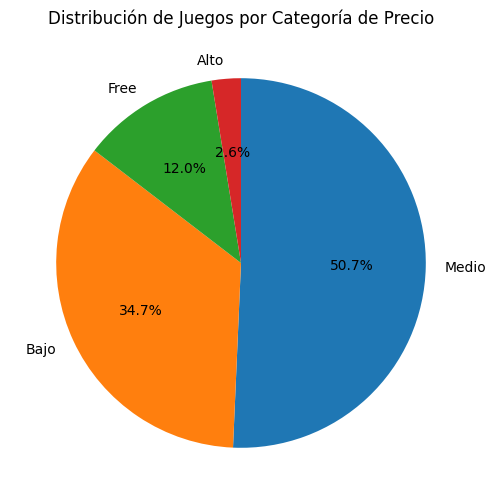

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear categorías
def categorizar_precio(x):
    try:
        x = float(x)
    except:
        return "Free"   # por si hay nulos o valores raros
    if x == 0:
        return "Free"
    elif 1 <= x <= 5.99:
        return "Bajo"
    elif 6 <= x <= 24.99:
        return "Medio"
    elif x >= 25:
        return "Alto"
    else:
        return "Free"

df["Categoria_Precio"] = df["Discounted Price"].apply(categorizar_precio)

# Contar valores por categoría
conteo = df["Categoria_Precio"].value_counts()

# Gráfico de torta
plt.figure(figsize=(6,6))
plt.pie(conteo, labels=conteo.index, autopct="%1.1f%%", startangle=90, counterclock=False)
plt.title("Distribución de Juegos por Categoría de Precio")
plt.show()


In [21]:
##Vamos a hacer un grafico para ver el top 10 de juegos que se estan jugando en Steam

import plotly.express as px

# Ordenamos por jugadores y tomamos los 10 primeros
top10 = df_procesado.sort_values("Jugadores_Actuales", ascending=False).head(10)

# Creamos gráfico de barras interactivo
fig = px.bar(
    top10,
    x="Title",
    y="Jugadores_Actuales",
    text="Jugadores_Actuales",
    title="Top 10 juegos más jugados ahora en Steam",
    labels={"Title": "Juego", "Jugadores_Actuales": "Jugadores Actuales"},
)

# Personalización: rotar nombres y poner texto encima
fig.update_traces(texttemplate='%{text:,}', textposition="outside")
fig.update_layout(xaxis_tickangle=-45)

fig.show()


In [23]:
# Acá veo la columna "géneros" y armo la parte de los gráficos para identificar cuál es el género más popular.
from collections import Counter

# Aplanar lista de listas de géneros
todos_generos = [g for lista in df_procesado["Géneros"] for g in lista]
conteo_generos = Counter(todos_generos)
df_generos = pd.DataFrame(conteo_generos.items(), columns=["Género", "Cantidad"])
df_generos = df_generos.sort_values("Cantidad", ascending=False)

In [24]:
import ast
from collections import Counter
import pandas as pd
import plotly.express as px
from ipywidgets import widgets, Output
from IPython.display import display, clear_output

# --- Función robusta que transforma una entrada 'Géneros' en una lista de strings legibles
def normalize_genre_entry(entry):
    """
    Devuelve una lista de géneros a partir de entry.
    Soporta:
     - listas/tuplas reales: ['Action','Adventure']
     - strings que contienen la representación de una lista: "['Action']"
     - strings con coma: "Action, Adventure"
     - strings simples: "Action"
    """
    if pd.isna(entry):
        return ["Desconocido"]
    # lista/tuple/set real
    if isinstance(entry, (list, tuple, set)):
        return [str(x).strip() for x in entry if x is not None and str(x).strip() != ""]
    # string: intentar parsear literal_eval si parece lista/tupla
    if isinstance(entry, str):
        s = entry.strip()
        # intenta literal_eval si tiene corchetes/paréntesis
        if (s.startswith("[") and s.endswith("]")) or (s.startswith("(") and s.endswith(")")):
            try:
                parsed = ast.literal_eval(s)
                if isinstance(parsed, (list, tuple, set)):
                    return [str(x).strip() for x in parsed if x is not None and str(x).strip() != ""]
            except Exception:
                # si falla, caemos al fallback
                pass
        # si contiene comas (y no es una URL), partir por comas
        if "," in s and "http" not in s:
            parts = [p.strip().strip('\'"') for p in s.split(",") if p.strip()]
            if parts:
                return parts
        # fallback: string simple (quitar comillas sobrantes)
        return [s.strip().strip('\'"')]
    # otros tipos (int, float, etc.)
    return [str(entry)]

# --- Construir lista plana de géneros sin modificar df_procesado ---
todos_generos = []
for val in df_procesado["Géneros"]:
    normalized = normalize_genre_entry(val)
    todos_generos.extend(normalized)

# --- Contar y crear df_generos ---
conteo_generos = Counter(todos_generos)
df_generos = pd.DataFrame(conteo_generos.items(), columns=["Género", "Cantidad"])
df_generos = df_generos.sort_values("Cantidad", ascending=False).reset_index(drop=True)

# Opcional: diagnostico rápido de entradas problemáticas originales (para que veas por qué pasaba)
# Muestra los tipos más comunes en df_procesado["Géneros"]
from collections import defaultdict
tipo_examples = defaultdict(list)
for v in df_procesado["Géneros"].head(200):  # chequeo sólo primeras 200 para no saturar
    tipo_examples[type(v).__name__].append(v)
print("Tipos detectados (ejemplos):")
for k, ex in tipo_examples.items():
    print(f"  {k}: ejemplo -> {ex[:2]}")  # muestro hasta 2 ejemplos por tipo

# --- Mostrar df_generos para verificar ---
display(df_generos.head(20))

# --- Plotly: Top 3 y selector interactivo (options = géneros legibles) ---
top3 = df_generos.head(3).copy()

fig = px.bar(
    top3,
    x="Género",
    y="Cantidad",
    title="Top 3 géneros más comunes",
    text="Cantidad",
    color="Género"
)
fig.update_traces(texttemplate="%{y:,}", textposition="outside", marker_line_width=0)
fig.update_layout(xaxis_title="Género", yaxis_title="Cantidad", showlegend=False, margin=dict(l=80, r=40, t=80, b=80))
fig.show()

# --- Selector interactivo (hasta 5 géneros) ---
opciones = df_generos["Género"].tolist()

selector = widgets.SelectMultiple(
    options=opciones,
    value=opciones[:3] if len(opciones) >= 3 else opciones,
    description='Géneros:',
    rows=6
)

out = Output()

def build_grouped_for_selection(sel_clean):
    # sel_clean aquí ya son géneros limpios (tal cual aparecen en df_generos)
    if not sel_clean:
        sel_clean = opciones[:3]
    df_sel = df_generos[df_generos["Género"].isin(sel_clean)].copy()
    return df_sel.sort_values("Cantidad", ascending=False)

def actualizar(change=None):
    seleccion = list(selector.value)[:5]
    if len(seleccion) == 0:
        seleccion = opciones[:3]
    df_sel = build_grouped_for_selection(seleccion)
    fig = px.bar(df_sel, x="Género", y="Cantidad", text="Cantidad", color="Género",
                 title=f"Comparativa de géneros seleccionados ({len(seleccion)})")
    fig.update_traces(texttemplate="%{y:,}", textposition="outside", marker_line_width=0)
    fig.update_layout(xaxis_title="Género", yaxis_title="Cantidad", showlegend=False, margin=dict(l=80, r=40, t=70, b=80))
    with out:
        clear_output(wait=True)
        fig.show()

selector.observe(actualizar, names='value')
display(selector)
display(out)
actualizar()


Tipos detectados (ejemplos):
  str: ejemplo -> ["['Adventure', 'RPG', 'Strategy']", "['Action', 'Free To Play']"]


Género  Cantidad
0                   Indie       934
1                  Action       682
2               Adventure       630
3                  Casual       457
4                Strategy       338
5              Simulation       337
6                     RPG       328
7            Early Access        88
8            Free To Play        87
9                  Sports        74
10  Massively Multiplayer        61
11                 Racing        52
12                   Aksi         7
13            Petualangan         6
14                Violent         6
15                   Gore         5
16         Sexual Content         4
17             Estratégia         2
18                   Ação         2
19                 Acción         2

SelectMultiple(description='Géneros:', index=(0, 1, 2), options=('Indie', 'Action', 'Adventure', 'Casual', 'St…

Output()

In [ ]:
#normalizar datos para que quede todo con el mismo nombre
df_generos['Género'] = df_generos['Género'].replace({
    'Accion': 'Action',
    'Acción': 'Action',
    'Aksi': 'Action',
    'Ação': 'Action',
    'Aventura': 'Adventure',
    'Petualangan':'Adventure',
    'Estratégia': 'Strategy',
    'Simulationen': 'Simulation',
    'Simulación': 'Simulation',
    'Simulasi':'Simulation'

})


In [ ]:
df_generos = df_generos.groupby('Género', as_index=False)['Cantidad'].sum()


In [ ]:
df_generos

Género  Cantidad
0                  Action       693
1               Adventure       637
2                  Casual       457
3            Early Access        88
4            Free To Play        87
5                    Gore         5
6                   Indie       934
7   Massively Multiplayer        61
8     Multijugador masivo         1
9                  Nudity         1
10               Olahraga         1
11                    RPG       328
12                 Racing        52
13            Rollenspiel         1
14         Sexual Content         4
15             Simulation       339
16                 Sports        74
17              Strategie         1
18               Strategy       340
19                Violent         6

In [25]:
#Grafico de dia a dia de jugadores en el top 10

In [26]:
!gdown 1dFoqW2frMSXe3gizEFJwNsdpr0Ewgah-

Downloading...
From: https://drive.google.com/uc?id=1dFoqW2frMSXe3gizEFJwNsdpr0Ewgah-
To: /content/DataFrame_JugadoresActuales.xlsx
100% 1.11M/1.11M [00:00<00:00, 157MB/s]


In [27]:
#Asociar la ruta a una variable
df_jugadores = pd.read_excel('/content/DataFrame_JugadoresActuales.xlsx')

In [28]:
df_jugadores.head()

ID_juego                             Title  Appid_del_Link  \
0         1                   Baldur's Gate 3         1086940   
1         2  Counter-Strike: Global Offensive             730   
2         3                      Apex Legends         1172470   
3         4                   Forza Horizon 5         1551360   
4         5                     Call of Duty®         1938090   

   Jugadores_Dia:1  Jugadores_Dia:12_10_2025  Jugadores_Dia:13_10_2025  \
0          80835.0                   56424.0                   58012.0   
1        1014674.0                  648894.0                 1158380.0   
2          60073.0                   48184.0                   74281.0   
3          14457.0                    6884.0                   14618.0   
4          91265.0                   54397.0                   52206.0   

   Jugadores_Dia:14_10_2025  Jugadores_Dia:15_10_2025  \
0                   44917.0                   51190.0   
1                  575355.0                 1340543.0   
2                   36516.0                  127614.0   
3                    6721.0                   18170.0   
4                   39034.0                   39408.0   

   Jugadores_Dia:20_10_2025  
0                   57692.0  
1                 1161249.0  
2                   66812.0  
3                   13088.0  
4                   48006.0

In [29]:
import pandas as pd
import plotly.express as px

# --- 1️⃣ Tomar el top 10 por Jugadores_Dia:1 ---
top10 = df_jugadores.sort_values("Jugadores_Dia:1", ascending=False).head(10)

# --- 2️⃣ Gráfico de BARRAS comparando ambos días ---
df_melt = top10.melt(
    id_vars=["Title"],
    value_vars=["Jugadores_Dia:1", "Jugadores_Dia:12_10_2025",	"Jugadores_Dia:13_10_2025",	"Jugadores_Dia:14_10_2025",	"Jugadores_Dia:15_10_2025",	"Jugadores_Dia:20_10_2025"],
    var_name="Día",
    value_name="Jugadores"
)

fig_bar = px.bar(
    df_melt,
    x="Title",
    y="Jugadores",
    color="Día",
    barmode="group",
    title="Top 10 Juegos Más Jugados - Comparación de Dias",
    labels={"Title": "Juego", "Jugadores": "Jugadores Activos"}
)

fig_bar.update_layout(xaxis_tickangle=-30)
fig_bar.show()

# --- 3️⃣ Gráfico de LÍNEAS para ver la tendencia ---
fig_line = px.line(
    df_melt,
    x="Title",
    y="Jugadores",
    color="Día",
    markers=True,
    title="Evolución de Jugadores - Top 10 Juegos",
    labels={"Title": "Juego", "Jugadores": "Jugadores Activos"}
)

fig_line.update_layout(xaxis_tickangle=-30)
fig_line.show()



###Informe de Resultados

Se realizaron diversos gráficos para identificar las principales tendencias del mercado de videojuegos en Steam. En primer lugar, se observa una marcada predominancia de títulos free-to-play, lo cual resulta lógico considerando que muchos de estos proyectos son de pequeño o mediano alcance, orientados a modelos de monetización diferida o creados como parte de prácticas profesionales y portfolios. Este enfoque busca maximizar el alcance y la cantidad de jugadores, priorizando la difusión sobre la ganancia inmediata.

Asimismo, se aprecia una diferencia significativa entre los juegos más jugados y el resto del catálogo. Incluso, a partir del segundo puesto, las métricas disminuyen de forma abrupta. Esto puede explicarse porque el conjunto de datos original contiene registros hasta 2023, reflejando la consistencia y permanencia de los títulos más populares antes que el efecto de lanzamientos recientes o fenómenos de “FOMO”.

Por ejemplo, Battlefield 6, lanzado apenas una semana antes de la fecha de análisis, muestra valores iniciales elevados. Sin embargo, será necesario observar su evolución con el paso del tiempo para determinar si mantiene esa tendencia. Casos similares ocurrieron con varios juegos que figuran en el top 10 del conjunto analizado: títulos que presentaron picos de jugadores en su lanzamiento, pero cuya base activa se estabilizó posteriormente.

En síntesis, los datos sugieren que los títulos con alta expectativa o fuerte interés del público suelen alcanzar un rendimiento inicial destacado, aunque su permanencia en el tiempo depende de la capacidad de sostener ese interés más allá del lanzamiento.

In [30]:
#Nose porque pero elimina todo si hago la eliminacion de nulos desde el df_model asi que divido las cosas
df_p2 = df_p1.copy()

In [31]:
##Limpiar nombres

df_p2 = df_p2.rename(columns={
    'ID_juego': 'id_juego',
    'Title': 'titulo',
    'Original Price': 'precio_original',
    'Discounted Price': 'precio_descuento',
    'Release Date': 'fecha_lanzamiento',
    'Link': 'enlace',
    'Game Description': 'descripcion_juego',
    'Recent Reviews Summary': 'resumen_reseñas_recientes',
    'All Reviews Summary': 'resumen_reseñas_totales',
    'Recent Reviews Number': 'numero_reseñas_recientes',
    'Appid_del_Link': 'appid_enlace',
    'Confirmación_de_Api': 'confirmacion_api',
    'Jugadores_Actuales': 'jugadores_actuales',
    'Valoración': 'valoracion',
    'Géneros': 'generos',
    'Jugadores_Dia:12_10_2025': 'jugadores_dia_12_10_2025',
    'total_positive': 'total_positivas',
    'total_negative': 'total_negativas',
    'porcentaje_aprobacion': 'porcentaje_aprobacion',
    'Valoracion_Pos': 'valoracion_pos',
    'Año_Lanzamiento': 'año_lanzamiento'
})

In [32]:
df_p2.columns

Index(['id_juego', 'titulo', 'precio_original', 'precio_descuento',
       'fecha_lanzamiento', 'enlace', 'descripcion_juego',
       'resumen_reseñas_recientes', 'resumen_reseñas_totales',
       'numero_reseñas_recientes', 'All Reviews Number', 'Developer',
       'Publisher', 'Supported Languages', 'Popular Tags', 'Game Features',
       'Minimum Requirements', 'Categoria_Precio', 'Appid_del_Juego',
       'appid_enlace', 'confirmacion_api', 'jugadores_actuales', 'valoracion',
       'generos', 'jugadores_dia_12_10_2025'],
      dtype='object')

In [33]:
df_p2.head()

id_juego                            titulo precio_original  \
0         1                   Baldur's Gate 3          $29.99   
1         2  Counter-Strike: Global Offensive          $14.99   
2         3                      Apex Legends            Free   
3         4                   Forza Horizon 5          $34.78   
4         5                     Call of Duty®            Free   

   precio_descuento fecha_lanzamiento  \
0             29.99        2023-08-03   
1             14.99        2012-08-21   
2              0.00        2020-11-04   
3             17.39        2021-11-08   
4              0.00        2022-10-27   

                                              enlace  \
0  https://store.steampowered.com/app/1086940/Bal...   
1  https://store.steampowered.com/app/730/Counter...   
2  https://store.steampowered.com/app/1172470/Ape...   
3  https://store.steampowered.com/app/1551360/For...   
4  https://store.steampowered.com/app/1938090/Cal...   

                                   descripcion_juego  \
0  Baldurs Gate 3 is a story-rich, party-based RP...   
1  Counter-Strike: Global Offensive (CS: GO) expa...   
2  Apex Legends is the award-winning, free-to-pla...   
3  Your Ultimate Horizon Adventure awaits! Explor...   
4  Welcome to Call of Duty® HQ, the home of Call ...   

  resumen_reseñas_recientes resumen_reseñas_totales  \
0   Overwhelmingly Positive         Mostly Positive   
1             Very Positive           Very Positive   
2                     Mixed           Very Positive   
3             Very Positive           Very Positive   
4                     Mixed           Very Positive   

                            numero_reseñas_recientes  ...  \
0  - 96% of the 128,900 user reviews in the last ...  ...   
1  - 89% of the 75,284 user reviews in the last 3...  ...   
2  - 65% of the 18,581 user reviews in the last 3...  ...   
3  - 87% of the 4,120 user reviews in the last 30...  ...   
4  - 49% of the 8,257 user reviews in the last 30...  ...   

                                       Game Features  \
0  ['Single-player', 'Online Co-op', 'LAN Co-op',...   
1  ['Steam Achievements', 'Full controller suppor...   
2  ['Online PvP', 'Online Co-op', 'Steam Achievem...   
3  ['Single-player', 'Online PvP', 'Online Co-op'...   
4  ['Single-player', 'Online PvP', 'Online Co-op'...   

                                Minimum Requirements Categoria_Precio  \
0  Requires a 64-bit processor and operating syst...             Alto   
1  OS: |  Windows® 7/Vista/XP | Processor: |  Int...            Medio   
2  Requires a 64-bit processor and operating syst...             Free   
3  Requires a 64-bit processor and operating syst...            Medio   
4  Requires a 64-bit processor and operating syst...             Free   

  Appid_del_Juego appid_enlace confirmacion_api jugadores_actuales  \
0       1086940.0      1086940             True            80835.0   
1             NaN          730            False          1014674.0   
2       1172470.0      1172470             True            60073.0   
3       1551360.0      1551360             True            14457.0   
4       1938090.0      1938090             True            91265.0   

                                          valoracion  \
0  {'total_reviews': 787173, 'total_positive': 76...   
1  {'total_reviews': 9064553, 'total_positive': 7...   
2  {'total_reviews': 1011125, 'total_positive': 6...   
3  {'total_reviews': 241141, 'total_positive': 21...   
4  {'total_reviews': 736472, 'total_positive': 43...   

                                             generos  jugadores_dia_12_10_2025  
0                   ['Adventure', 'RPG', 'Strategy']                   56424.0  
1                         ['Action', 'Free To Play']                  648894.0  
2            ['Action', 'Adventure', 'Free To Play']                   48184.0  
3  ['Action', 'Adventure', 'Racing', 'Simulation'...                    6884.0  
4                                         ['Action']  

# **Modelos de Aprendizaje**

A partir del análisis del objetivo del proyecto (evaluar la valoración de los videojuegos en la plataforma Steam) decidí desarrollar dos modelos básicos de aprendizaje supervisado.

Primero uno de Clasificacion: donde el objetivo es hacer una tendencia de si esta muy bien valorado o no Usando un Random Forest
*   Objetivo: Predecir si un juego será bien valorado (por ejemplo, si tendrá “reseñas positivas” o “muy positivas”)

Segundo otro de Regresion: usando un Linear regesor o un random Forest buscare hacer una predicion sobre la positividad que tendra el juego apartir de la informacion dada
Objetivo: Predecir el puntaje promedio de reseñas o el número de reseñas positivas

**Para eso se usaran las Variables**

* Title como base
* Discounted Price Que es el precio del juego y si es free o no que hace que tenga mucho valor
* Release Date
* All Reviews Summary una categorial de 8 regimenes de Valoraciones en general
* Developer Dependiendo si tiene muchos juegos positivos posiblemente su empresa se vea positiva etc
* Valoraciones que tiene algunos elementos cono las review postivas y el porsentaje de positivdad que podria usar para ver proyecciones a futuro
* Jugadores_Actuales



In [34]:
#Vamos a usar un DataFrame nuevo
#https://docs.google.com/spreadsheets/d/1gQAt0Sdopzcqv2VuMDJWGuZ5sO8K699o/edit?usp=sharing&ouid=116135415875326405759&rtpof=true&sd=true
!gdown 1gQAt0Sdopzcqv2VuMDJWGuZ5sO8K699o

Downloading...
From: https://drive.google.com/uc?id=1gQAt0Sdopzcqv2VuMDJWGuZ5sO8K699o
To: /content/Data_Frame_V2.xlsx
100% 7.96M/7.96M [00:00<00:00, 30.6MB/s]


In [35]:
#Asociar la ruta a una variable
df_p1 = pd.read_excel('/content/Data_Frame_V2.xlsx')

In [ ]:
df_p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18375 entries, 0 to 18374
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID_juego                  18375 non-null  int64         
 1   Title                     18370 non-null  object        
 2   Original Price            18375 non-null  object        
 3   Discounted Price          18375 non-null  float64       
 4   Release Date              18375 non-null  datetime64[ns]
 5   Link                      18375 non-null  object        
 6   Game Description          18373 non-null  object        
 7   Recent Reviews Summary    18375 non-null  object        
 8   All Reviews Summary       18168 non-null  object        
 9   Recent Reviews Number     18371 non-null  object        
 10  All Reviews Number        4477 non-null   object        
 11  Developer                 18342 non-null  object        
 12  Publisher         

##**Prueba de modelo de Clasificacion**

In [36]:
df_p2['resumen_reseñas_totales'].value_counts()

resumen_reseñas_totales
Very Positive              6498
Positive                   6310
Mostly Positive            3105
Mixed                      2092
Overwhelmingly Positive     128
Mostly Negative              21
Very Negative                 6
9 user reviews                4
3 user reviews                2
1 user reviews                2
Name: count, dtype: int64

In [37]:
# Usare un lader Para asi facilitar los datos de All Reviews Summar-> LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
recepcion_label = encoder.fit_transform(df_p2['resumen_reseñas_totales'])

In [38]:
encoded_juegos = pd.DataFrame(recepcion_label, columns=['resumen_reseñas_totales'])
encoded_juegos.head()

resumen_reseñas_totales
0                        5
1                        9
2                        9
3                        9
4                        9

In [39]:
#Vamos a extraer algunos datos para despues procesar en el modela de clasificacion usadon la columna Valoración
import ast
import json
import pandas as pd

# Función para parsear una celda y devolver total_positive y porcentaje
def parse_review_summary(cell):
    # Manejo de nulos
    if pd.isna(cell):
        return pd.Series([None, None, None])

    # Normalizar a dict
    try:
        if isinstance(cell, dict):
            d = cell
        elif isinstance(cell, str):
            # Intentamos literal_eval (más seguro), si falla, intentamos json.loads
            try:
                d = ast.literal_eval(cell)
            except Exception:
                d = json.loads(cell)
        else:
            # Si viene en otro formato (p.ej. lista), intentar convertir a dict
            d = dict(cell)
    except Exception:
        return pd.Series([None, None, None])

    # Sacar valores
    total_positive = d.get("total_positive")
    total_negative = d.get("total_negative")
    porcentaje = d.get("porcentaje_aprobacion")

    # Si no viene el porcentaje, intentar calcularlo si tenemos total_reviews
    if porcentaje is None:
        total = d.get("total_reviews")
        if total and total_positive is not None:
            try:
                porcentaje = round((total_positive / total) * 100, 2)
            except Exception:
                porcentaje = None

    return pd.Series([total_positive, total_negative, porcentaje])

# Aplicar y crear columnas nuevas
df_p2[["total_positivas", "total_negativas", "porcentaje_aprobacion"]] = df_p2["valoracion"].apply(parse_review_summary)

# Crear la etiqueta binaria: 1 si >=85, 0 si <85 o NaN -> 0 (según pediste)
df_p2["valoracion_pos"] = df_p2["porcentaje_aprobacion"].apply(lambda x: 1 if pd.notna(x) and x >= 85 else 0)

# Vista rápida
print(df_p2[["titulo", "appid_enlace", "total_positivas","total_negativas" , "porcentaje_aprobacion", "valoracion_pos"]].head())

# Resumen de cuántos quedan en cada clase
print("\nConteo valoracion_pos:")
print(df_p2["valoracion_pos"].value_counts(dropna=False))


                             titulo  appid_enlace  total_positivas  \
0                   Baldur's Gate 3       1086940         762307.0   
1  Counter-Strike: Global Offensive           730        7833599.0   
2                      Apex Legends       1172470         679485.0   
3                   Forza Horizon 5       1551360         213831.0   
4                     Call of Duty®       1938090         432997.0   

   total_negativas  porcentaje_aprobacion  valoracion_pos  
0          24866.0                  96.84               1  
1        1230954.0                  86.42               1  
2         331640.0                  67.20               0  
3          27310.0                  88.67               1  
4         303475.0                  58.79               0  

Conteo valoracion_pos:
valoracion_pos
1    9315
0    9060
Name: count, dtype: int64


In [40]:
#Por ultimo procesamos el año del juego
# Convertir fecha a año numérico
df_p2["fecha_lanzamiento"] = pd.to_datetime(df_p2["fecha_lanzamiento"], errors="coerce")
df_p2["año_lanzamiento"] = df_p2["fecha_lanzamiento"].dt.year

In [41]:
#Parece que hay un par de nulos que voy a eliminar
df_p2 = df_p2.dropna(subset=["appid_enlace" , "precio_descuento", "total_positivas", "resumen_reseñas_totales", "año_lanzamiento", "valoracion_pos"])


In [42]:
#ver si quedan nulos
print("El precio de descuento nulo es:", df_p2["precio_descuento"].isnull().sum())
print("El total de reseñas positivas nulas son:", df_p2["total_positivas"].isnull().sum())
print("El total de reseñas negativas nulas son:", df_p2["total_negativas"].isnull().sum())
print("El resumen de reseñas totales nulo es:", df_p2["resumen_reseñas_totales"].isnull().sum())
print("El total de años de lanzamiento nulos es:", df_p2["año_lanzamiento"].isnull().sum())
print("El total de valoraciones positivas nulas es:", df_p2["valoracion_pos"].isnull().sum())


El precio de descuento nulo es: 0
El total de reseñas positivas nulas son: 0
El total de reseñas negativas nulas son: 0
El resumen de reseñas totales nulo es: 0
El total de años de lanzamiento nulos es: 0
El total de valoraciones positivas nulas es: 0


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Preprocesamiento ===

# Asegurar que las columnas estén en formato numérico
df_p2["precio_descuento"] = pd.to_numeric(df_p2["precio_descuento"], errors="coerce")
df_p2["total_positivas"] = pd.to_numeric(df_p2["total_positivas"], errors="coerce")
df_p2["total_negativas"] = pd.to_numeric(df_p2["total_negativas"], errors="coerce")
# Cambien las Reseñas totales a encoded otravez porque no las tomo bien en la primera
# If not, the encoding step needs to be applied to df_p2
# For now, I'll assume the encoded version is needed and needs to be merged or recreated on df_p2
# Let's re-encode on df_p2 to be safe and ensure alignment after dropping rows
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_p2['resumen_reseñas_totales_encoded'] = encoder.fit_transform(df_p2['resumen_reseñas_totales'])


# === 2. Selección de variables ===
X = df_p2[["precio_descuento", "total_positivas" ,"total_negativas" , "resumen_reseñas_totales_encoded", "año_lanzamiento"]]
y = df_p2["valoracion_pos"]

In [44]:
# === 3. Separar datos de entrenamiento y prueba ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 4. Entrenamiento del modelo ===
model = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_split=5 , min_samples_leaf=2, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [45]:
# === 5. Evaluación del modelo ===
y_pred = model.predict(X_test)

Confusion Matrix:
[[1659  130]
 [ 378 1466]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1789
           1       0.92      0.80      0.85      1844

    accuracy                           0.86      3633
   macro avg       0.87      0.86      0.86      3633
weighted avg       0.87      0.86      0.86      3633


Accuracy Score:
0.8601706578585191


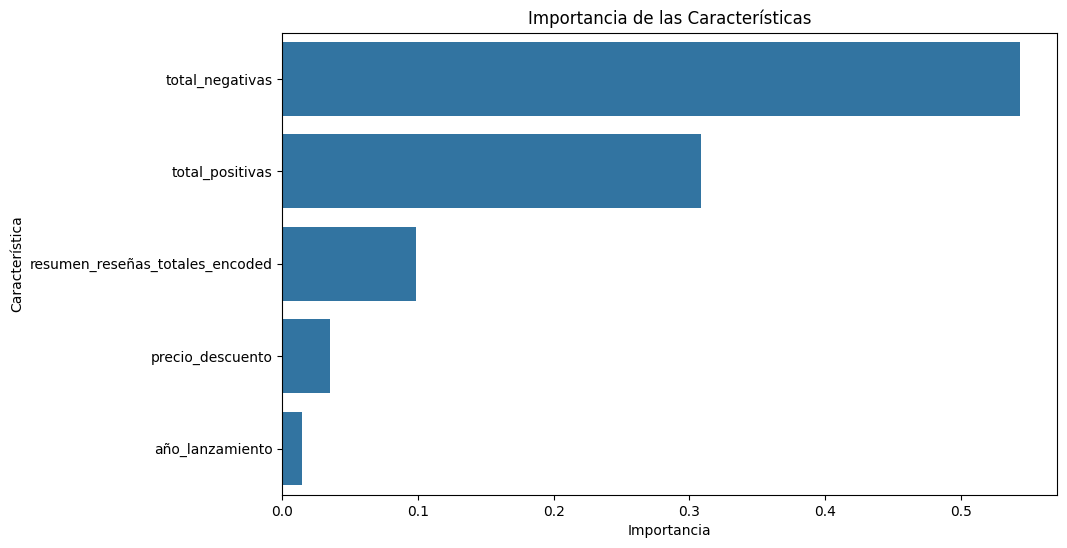

In [46]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Feature Importance (Optional but helpful)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Importancia de las Características")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()

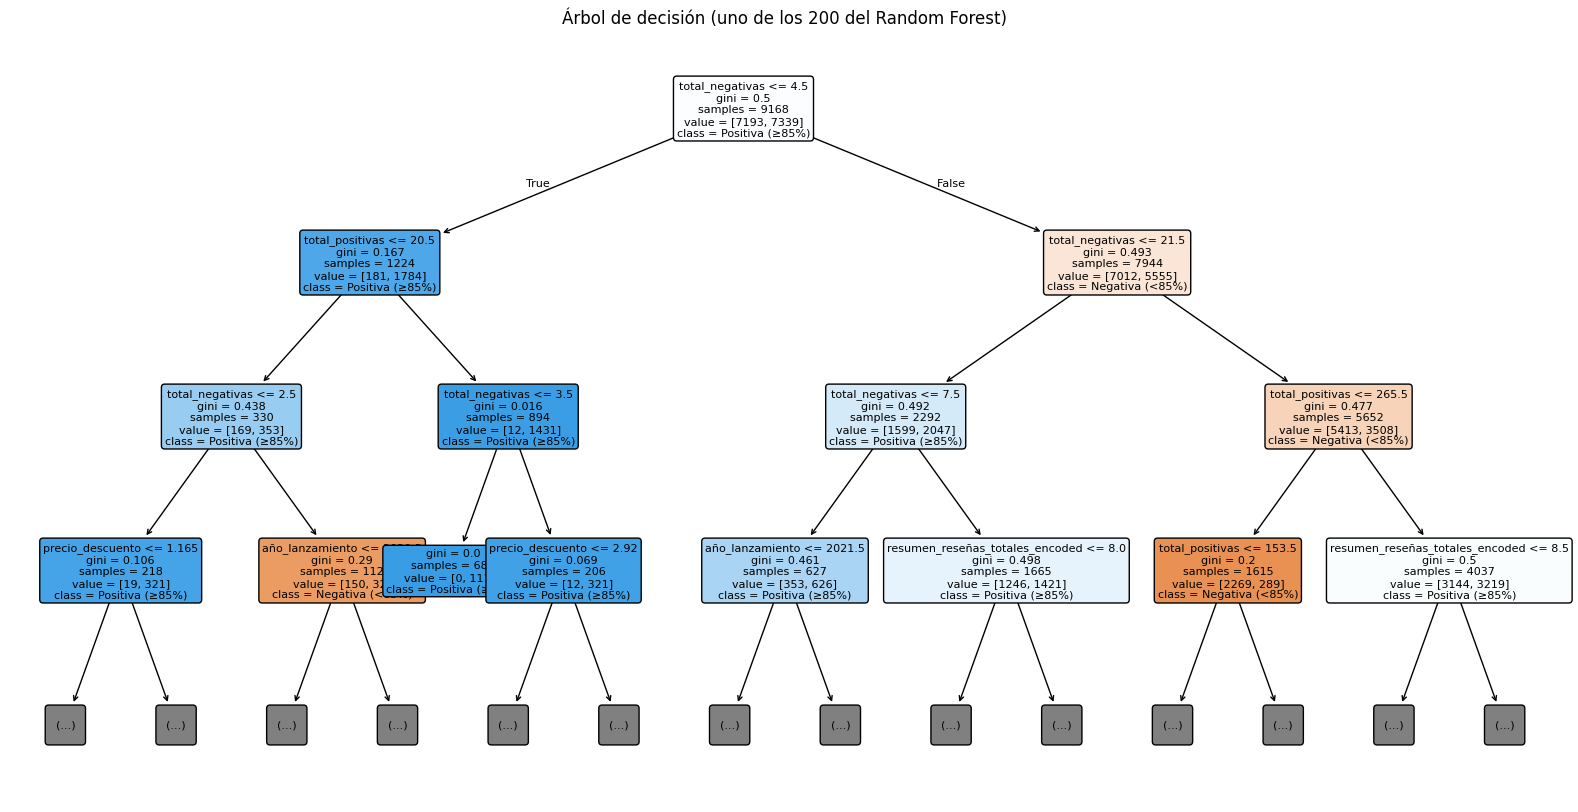

In [47]:
from sklearn import tree

# === 7. Visualizar un árbol individual del Random Forest ===

# Tomamos uno de los árboles del Random Forest (por ejemplo, el primero)
estimator = model.estimators_[0]

# Crear figura
plt.figure(figsize=(20, 10))

# Graficar el árbol
tree.plot_tree(
    estimator,
    feature_names=X.columns,
    class_names=["Negativa (<85%)", "Positiva (≥85%)"],
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=3  # 👈 ajustá este número si querés ver más o menos niveles
)

plt.title("Árbol de decisión (uno de los 200 del Random Forest)")
plt.show()


## **Análisis del Modelo de Aprendizaje**
###1. Primeros Hallazgos

>Al iniciar el entrenamiento del modelo, los resultados preliminares —aunque aún no concluyentes y en etapa exploratoria— permitieron identificar algunas tendencias iniciales relevantes.

>El objetivo del modelo era determinar qué videojuegos presentan mayores niveles de valoración en la plataforma Steam, tomando como referencia las encuestas y reseñas realizadas por los usuarios. En esta primera fase se consideraron como positivas aquellas reseñas con una calificación igual o superior al 70%.

>Los primeros análisis indicaron que las reseñas eran el factor más determinante, tanto en cantidad como en proporción de valoraciones positivas. Esto resultaba coherente, ya que los usuarios tienden a dejar una reseña cuando la experiencia fue muy satisfactoria o extremadamente negativa, convirtiéndolas así en una fuente sólida para estimar el nivel de aceptación de cada título.

>Sin embargo, también se detectó un problema significativo: la variable *"All Reviews Summary_Encoded"* presentaba valores de 0, lo cual sugería errores de carga o inconsistencias en el registro de datos. Esto implicaba que los resultados iniciales debían considerarse experimentales y que el modelo requería una revisión y depuración antes de poder extraer conclusiones confiables.

>En síntesis, los primeros hallazgos destacaban el peso de las reseñas como principal indicador de valoración, pero también evidenciaban limitaciones en la calidad del dataset y en la confiabilidad de los resultados obtenidos.


####2. Ajustes Posteriores y Mejora del Modelo

Tras analizar los datos en mayor profundidad y realizar múltiples iteraciones del modelo, se identificaron varios problemas que justificaban una revisión completa de los supuestos iniciales:

1.Sesgo en los datos:
El modelo obtenía buenos resultados no porque su desempeño fuera óptimo, sino porque los datos estaban fuertemente inclinados hacia valoraciones positivas. Esto generaba una falsa sensación de precisión.

2.Desbalance en las métricas:
La lectura de las valoraciones —aun con números similares— no siempre reflejaba el mismo porcentaje de aprobación. Esto se debía a la naturaleza subjetiva de las reseñas, donde el sesgo individual impacta directamente en la valoración general.

3.Hiperparámetros insuficientes:
En la etapa inicial se utilizaron únicamente los parámetros estándar del modelo. Una vez comprendida la estructura de los datos, se volvió necesario ajustar manualmente los hiperparámetros o utilizar técnicas como GridSearch para mejorar el desempeño.

####Cambios aplicados

Tras varias pruebas, se definieron las siguientes modificaciones:

* **Cambio del umbral de positividad del 70% al 85%:**
Esto permitió trabajar con un criterio más acorde al comportamiento real de la plataforma, donde un juego con menos del 50% de aprobación es considerado de baja calidad. Con este nuevo umbral, las estadísticas de prueba alcanzaron ratios del 50%, lo cual resultó mucho más representativo para el análisis.

*Ajuste de hiperparámetros, utilizando:

max_depth = 5  
min_samples_leaf = 2  
min_samples_split = 5  
n_estimators = 200


Estas configuraciones permitieron controlar mejor el sesgo, aumentar la estabilidad del modelo y generar predicciones más consistentes.

*Incorporación del total de reseñas negativas:
Añadir esta variable fue uno de los avances más significativos: el modelo pasó de un 62% a un 86% de efectividad, logrando resultados más equilibrados y con mayor valor analítico.

>*En conjunto, estas mejoras permitieron construir un modelo más sólido, menos sesgado y más aplicable a situaciones reales. Aunque permanece condicionado por factores subjetivos —dado que la valoración en Steam depende en gran parte de percepciones personales—, el modelo logra reducir este sesgo a un margen aceptable, mejorando su utilidad para identificar qué aspectos valoran los jugadores y qué tendencias pueden orientar el desarrollo de futuros videojuegos.*




#Pruebas de Elementos

##Vamos a ver algunos outliner

In [48]:
df_p2.head(1)

id_juego           titulo precio_original  precio_descuento  \
0         1  Baldur's Gate 3          $29.99             29.99   

  fecha_lanzamiento                                             enlace  \
0        2023-08-03  https://store.steampowered.com/app/1086940/Bal...   

                                   descripcion_juego  \
0  Baldurs Gate 3 is a story-rich, party-based RP...   

  resumen_reseñas_recientes resumen_reseñas_totales  \
0   Overwhelmingly Positive         Mostly Positive   

                            numero_reseñas_recientes  ... jugadores_actuales  \
0  - 96% of the 128,900 user reviews in the last ...  ...            80835.0   

                                          valoracion  \
0  {'total_reviews': 787173, 'total_positive': 76...   

                            generos jugadores_dia_12_10_2025 total_positivas  \
0  ['Adventure', 'RPG', 'Strategy']                  56424.0        762307.0   

  total_negativas porcentaje_aprobacion valoracion_pos  año_lanzamiento  \
0         24866.0                 96.84              1             2023   

   resumen_reseñas_totales_encoded  
0                                5  

[1 rows x 31 columns]

In [49]:
df_p2['valoracion_pos'].value_counts()

valoracion_pos
1    9219
0    8946
Name: count, dtype: int64

In [50]:
#Calcular Q1 (Primer Cuartil) Q3 (Tercer Cuartil)
Q1 = df_p2['precio_descuento'].quantile(0.25)
Q3 = df_p2['precio_descuento'].quantile(0.75)
# Calcular el rango intercuartil (IQR)
IQR = Q3 - Q1
#Definir los limites para detectar Outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Para ver el valor de Q1, puede imprimirlo directamente:
print('Valor Q1:', Q1)
# Para ver el valor de Q3, puede imprimirlo directamente:
print('Valor Q3:', Q3)
# Para ver el valor de IQR, puede imprimirlo directamente:
print('Valor IQR:', IQR)
# Para ver el valor de limite_inferior, puede imprimirlo directamente:
print('Limite inferior:', limite_inferior)
# Para ver el valor de limite_superior, puede imprimirlo directamente:
print('Limite superior:', limite_superior)

Valor Q1: 2.79
Valor Q3: 9.99
Valor IQR: 7.2
Limite inferior: -8.010000000000002
Limite superior: 20.79


In [51]:
# Identificar outliers
df_outlier = df_p2[(df_p2['precio_descuento'] < limite_inferior) | (df_p2['precio_descuento'] > limite_superior)]

In [52]:
df_outlier.sort_values(by='precio_descuento', ascending=False)

id_juego                             titulo precio_original  \
12278     12281                           BLACKOUT       $1,999.98   
834         835               RealFlight Evolution          $99.99   
11033     11036                         Spooky Men          $89.99   
683         684                        WILD HEARTS          $69.99   
456         457                Need for Speed Heat          $69.99   
...         ...                                ...             ...   
243         244                               Sifu          $20.99   
2346       2347                 Redemption Reapers          $34.99   
2108       2109                     Torchlight III          $20.99   
2065       2066  SAMURAI SHODOWN NEOGEO COLLECTION          $20.99   
8012       8014                Tennis Manager 2022          $20.99   

       precio_descuento fecha_lanzamiento  \
12278           1999.98        2021-05-21   
834               99.99        2022-10-27   
11033             89.99        2023-05-09   
683               69.99        2023-02-16   
456               69.99        2020-06-04   
...                 ...               ...   
243               20.99        2023-03-28   
2346              20.99        2023-02-22   
2108              20.99        2020-10-13   
2065              20.99        2020-06-18   
8012              20.99        2022-05-17   

                                                  enlace  \
12278  https://store.steampowered.com/app/1583590/BLA...   
834    https://store.steampowered.com/app/2069310/Rea...   
11033  https://store.steampowered.com/app/2204850/Spo...   
683    https://store.steampowered.com/app/1938010/WIL...   
456    https://store.steampowered.com/app/1222680/Nee...   
...                                                  ...   
243    https://store.steampowered.com/app/2138710/Sif...   
2346   https://store.steampowered.com/app/2139300/Red...   
2108   https://store.steampowered.com/app/1030210/Tor...   
2065   https://store.steampowered.com/app/999660/SAMU...   
8012   https://store.steampowered.com/app/1937620/Ten...   

                                       descripcion_juego  \
12278  BLACKOUT is a first-person survival horror vid...   
834    RealFlight® is the industry-leading flight sim...   
11033  Spooky Men is a online 1-8 player cooperative ...   
683    Master ancient tech to hunt down giant beasts....   
456    Hustle by day and risk it all at night in Need...   
...                                                  ...   
243    Sifu is a realistic third-person brawler with ...   
2346   Descending suddenly on the world, the macabre ...   
2108   In Torchlight III, Novastraia is again under t...   
2065   The ULTIMATE collection is here! It all began ...   
8012   Become a tennis manager. Manage your tennis ac...   

      resumen_reseñas_recientes resumen_reseñas_totales  \
12278                     Mixed                Positive   
834                       Mixed           Very Positive   
11033                     Mixed                Positive   
683                       Mixed                   Mixed   
456               Very Positive         Mostly Positive   
...                         ...                     ...   
243               Very Positive           Very Positive   
2346            Mostly Positive           Very Positive   
2108                      Mixed           Very Positive   
2065              Very Positive           Very Positive   
8012            Mostly Positive                Positive   

                                numero_reseñas_recientes  ...  \
12278  - 53% of the 41 user reviews for this game are...  ...   
834    - 68% of the 22 user reviews in the last 30 da...  ...   
11033  - 68% of the 19 user reviews for this game are...  ...   
683    - 60% of the 101 user reviews in the last 30 d...  ...   
456    - 82% of the 924 user reviews in the last 30 d...  ...   
...                                                  ...  ...   
243    - 93% of the

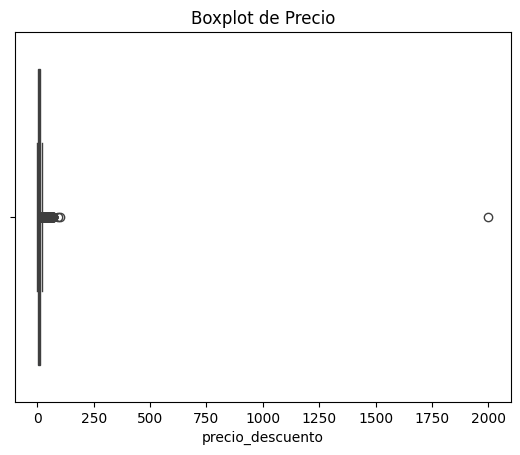

In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#ver el outliner en la box

sns.boxplot(x='precio_descuento',data=df_p2)
plt.title('Boxplot de Precio')
plt.show()

<>:10: SyntaxWarning:

invalid escape sequence '\$'

<>:10: SyntaxWarning:

invalid escape sequence '\$'

/tmp/ipython-input-1201033149.py:10: SyntaxWarning:

invalid escape sequence '\$'



Resumen de outliers por variable:

                          Q1       Q3     IQR  Límite inferior  \
jugadores_actuales      0.00     6.00    6.00           -9.000   
total_positivas        64.00  1014.00  950.00        -1361.000   
precio_descuento        2.79     9.99    7.20           -8.010   
porcentaje_aprobacion  76.77    91.84   15.07           54.165   
precio_original         2.99    10.29    7.30           -7.960   

                       Límite superior  Cantidad de outliers  
jugadores_actuales              15.000                3204.0  
total_positivas               2439.000                2865.0  
precio_descuento                20.790                 656.0  
porcentaje_aprobacion          114.445                 473.0  
precio_original                 21.240                 740.0  


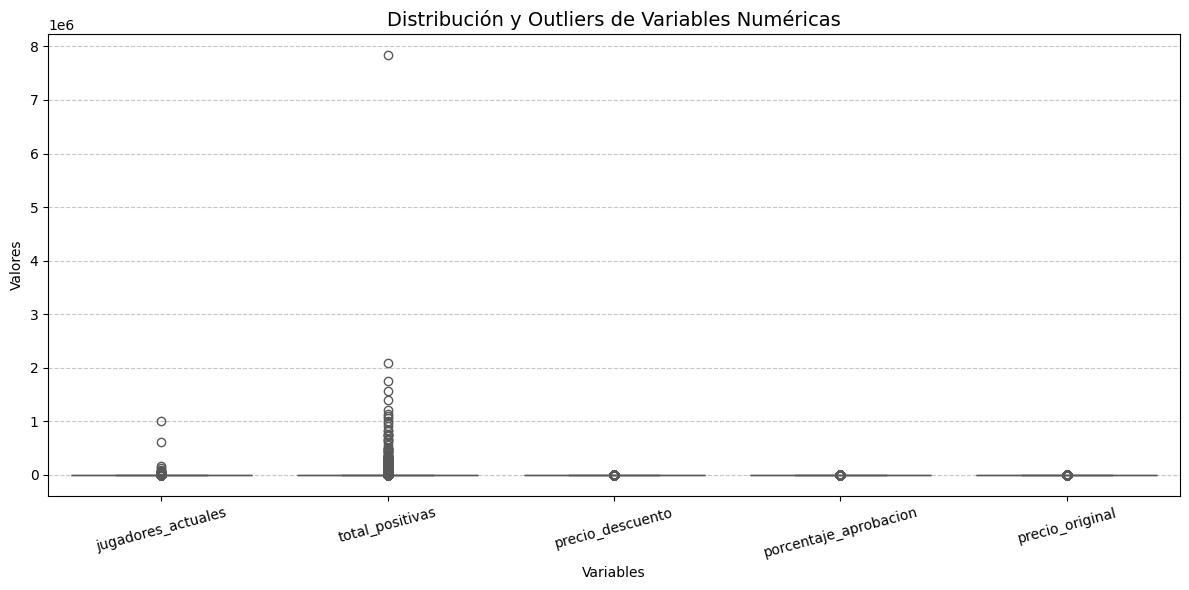

In [54]:
# === 1. Importar librerías ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# === 2. Limpiar columna de precio_original ===
# Convierte el texto tipo "$99.99" a float 99.99
df_p2["precio_original"] = df_p2["precio_original"].replace("Free", "0")
df_p2["precio_original"] = df_p2["precio_original"].replace('[\$,]', '', regex=True).astype(float)

# === 4. Definir columnas numéricas a analizar ===
cols = ["jugadores_actuales", "total_positivas", "precio_descuento", "porcentaje_aprobacion", "precio_original"]

# === 5. Calcular límites de outliers con método IQR ===
outlier_info = {}
for col in cols:
    Q1 = df_p2[col].quantile(0.25)
    Q3 = df_p2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_p2[(df_p2[col] < lower) | (df_p2[col] > upper)][col]
    outlier_info[col] = {
        "Q1": Q1, "Q3": Q3, "IQR": IQR,
        "Límite inferior": lower,
        "Límite superior": upper,
        "Cantidad de outliers": len(outliers)
    }

# Mostrar resumen
outlier_df = pd.DataFrame(outlier_info).T
print("Resumen de outliers por variable:\n")
print(outlier_df)

# === 6. Gráfico Boxplot conjunto ===
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_p2[cols], palette="Set2")
plt.title("Distribución y Outliers de Variables Numéricas", fontsize=14)
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [55]:
import pandas as pd
import plotly.express as px

# Si ya tenés df cargado, omití esto:
# df = pd.read_csv("tu_archivo.csv")

# Limpiar precio_original (el mismo paso anterior)
#df["precio_original"] = df["precio_original"].replace("Free", "0")
#df["precio_original"] = df["precio_original"].replace('[\$,]', '', regex=True).astype(float)

# Variables que queremos analizar
#cols = ["jugadores_actuales", "total_positivas", "precio_descuento", "porcentaje_aprobacion", "precio_original"]

# Convertimos el DataFrame a formato largo (para que Plotly lo entienda)
df_long = df_p2.melt(value_vars=cols, var_name="Variable", value_name="Valor")

# Creamos el boxplot interactivo
fig = px.box(
    df_long,
    x="Variable",
    y="Valor",
    color="Variable",  # así cada box tiene su color
    title="Distribución y Outliers de Variables Numéricas",
    template="plotly_white"
)

# Opcional: ajustar el método de cuartiles
fig.update_traces(quartilemethod="exclusive")

# Mostrar gráfico
fig.show()


## K-meens con descuentos

voy a ver como usar esto para despues hacer un modelo

In [56]:
# Crear un dataframe filtrado sin BLACKOUT (pero sin borrarlo del original)
df_p2_clean = df_p2[df_p2["titulo"] != "BLACKOUT"]


Silhouette Score para k=3: 0.584


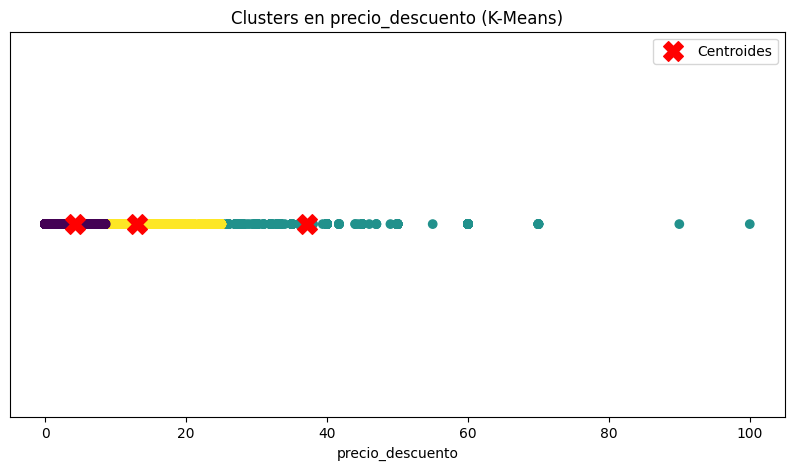

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# 1. Seleccionar la variable
X = df_p2_clean["precio_descuento"].values.reshape(-1, 1)

# 2. Elegir cantidad de clústers (ejemplo: 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# 3. Calcular el Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score para k={k}: {sil_score:.3f}")

# 4. Visualización del clustering (1D convertido a 2D en eje Y=0)
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], np.zeros_like(X), c=labels, cmap='viridis')

# centroides
plt.scatter(kmeans.cluster_centers_[:, 0],
            np.zeros(k),
            s=200,
            c='red',
            marker='X',
            label="Centroides")

plt.title("Clusters en precio_descuento (K-Means)")
plt.xlabel("precio_descuento")
plt.yticks([])  # sin eje Y porque no hace falta
plt.legend()
plt.show()


In [58]:
df_p2_clean.columns

Index(['id_juego', 'titulo', 'precio_original', 'precio_descuento',
       'fecha_lanzamiento', 'enlace', 'descripcion_juego',
       'resumen_reseñas_recientes', 'resumen_reseñas_totales',
       'numero_reseñas_recientes', 'All Reviews Number', 'Developer',
       'Publisher', 'Supported Languages', 'Popular Tags', 'Game Features',
       'Minimum Requirements', 'Categoria_Precio', 'Appid_del_Juego',
       'appid_enlace', 'confirmacion_api', 'jugadores_actuales', 'valoracion',
       'generos', 'jugadores_dia_12_10_2025', 'total_positivas',
       'total_negativas', 'porcentaje_aprobacion', 'valoracion_pos',
       'año_lanzamiento', 'resumen_reseñas_totales_encoded'],
      dtype='object')

Silhouette Score promedio: 0.974


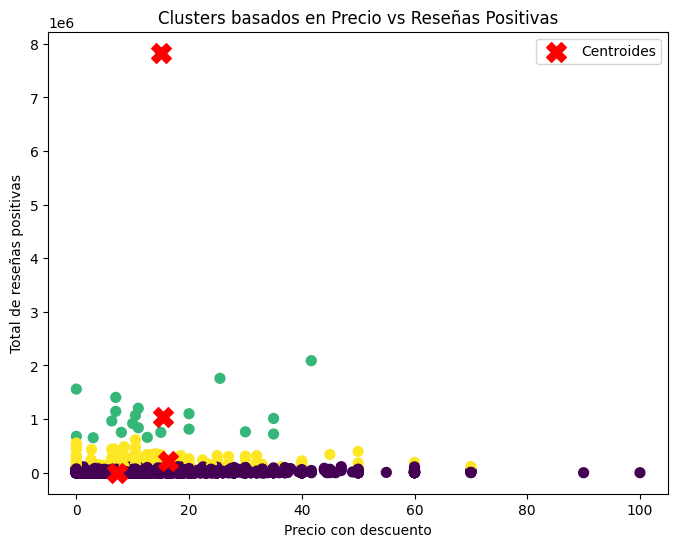

In [59]:
##Seguna prueba ahora con precio y total de reseñas positivas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# === 1. Manejar NaNs en las variables seleccionadas ===
df_p2_clean_filtered = df_p2_clean.dropna(subset=["precio_descuento", "total_positivas"])

# === 2. Seleccionar variables ===
X = df_p2_clean_filtered[["precio_descuento", "total_positivas"]].values

# === 3. K-Means con el número de clusters que quieras (ejemplo: 4) ===
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# === 4. Silhouette score para ver qué tan buenos son los clusters ===
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score promedio: {sil_score:.3f}")

# === 5. Gráfico ===
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200,
            c='red',
            marker='X',
            label='Centroides')

plt.xlabel("Precio con descuento")
plt.ylabel("Total de reseñas positivas")
plt.title("Clusters basados en Precio vs Reseñas Positivas")
plt.legend()
plt.show()

## Vamos a ver lo del tema de la api con las cosas del genero

Voy a armar una nueva hoja donde se busca los datos entre genero y mayor candidad de jugadores para asi hacer una muesta que de valor a nuestro estudio.

la premisa es:
buscar los tres genermos mas usados y hacer un top 5 de lo mejor y lo peor y ahi buscar las review de eso

In [60]:
##Armamos el nuevo data

df_p3 = df_p2_clean.copy()

In [61]:
df_p3.head()

id_juego                            titulo  precio_original  \
0         1                   Baldur's Gate 3            29.99   
1         2  Counter-Strike: Global Offensive            14.99   
2         3                      Apex Legends             0.00   
3         4                   Forza Horizon 5            34.78   
4         5                     Call of Duty®             0.00   

   precio_descuento fecha_lanzamiento  \
0             29.99        2023-08-03   
1             14.99        2012-08-21   
2              0.00        2020-11-04   
3             17.39        2021-11-08   
4              0.00        2022-10-27   

                                              enlace  \
0  https://store.steampowered.com/app/1086940/Bal...   
1  https://store.steampowered.com/app/730/Counter...   
2  https://store.steampowered.com/app/1172470/Ape...   
3  https://store.steampowered.com/app/1551360/For...   
4  https://store.steampowered.com/app/1938090/Cal...   

                                   descripcion_juego  \
0  Baldurs Gate 3 is a story-rich, party-based RP...   
1  Counter-Strike: Global Offensive (CS: GO) expa...   
2  Apex Legends is the award-winning, free-to-pla...   
3  Your Ultimate Horizon Adventure awaits! Explor...   
4  Welcome to Call of Duty® HQ, the home of Call ...   

  resumen_reseñas_recientes resumen_reseñas_totales  \
0   Overwhelmingly Positive         Mostly Positive   
1             Very Positive           Very Positive   
2                     Mixed           Very Positive   
3             Very Positive           Very Positive   
4                     Mixed           Very Positive   

                            numero_reseñas_recientes  ... jugadores_actuales  \
0  - 96% of the 128,900 user reviews in the last ...  ...            80835.0   
1  - 89% of the 75,284 user reviews in the last 3...  ...          1014674.0   
2  - 65% of the 18,581 user reviews in the last 3...  ...            60073.0   
3  - 87% of the 4,120 user reviews in the last 30...  ...            14457.0   
4  - 49% of the 8,257 user reviews in the last 30...  ...            91265.0   

                                          valoracion  \
0  {'total_reviews': 787173, 'total_positive': 76...   
1  {'total_reviews': 9064553, 'total_positive': 7...   
2  {'total_reviews': 1011125, 'total_positive': 6...   
3  {'total_reviews': 241141, 'total_positive': 21...   
4  {'total_reviews': 736472, 'total_positive': 43...   

                                             generos jugadores_dia_12_10_2025  \
0                   ['Adventure', 'RPG', 'Strategy']                  56424.0   
1                         ['Action', 'Free To Play']                 648894.0   
2            ['Action', 'Adventure', 'Free To Play']                  48184.0   
3  ['Action', 'Adventure', 'Racing', 'Simulation'...                   6884.0   
4                                         ['Action']                  54397.0   

  total_positivas total_negativas porcentaje_aprobacion valoracion_pos  \
0        762307.0         24866.0                 96.84              1   
1       7833599.0       1230954.0                 86.42              1   
2        679485.0        331640.0                 67.20              0   
3        213831.0         27310.0                 88.67              1   
4        432997.0        303475.0                 58.79              0   

   año_lanzamiento  resumen_reseñas_totales_encoded  
0             2023                                5  
1             2012                                9  
2             2020                                9  
3             2021                                9  
4             2022                                9  

[5 rows x 31 columns]

In [62]:
import pandas as pd

# === Crear el DataFrame de muestra ===

df_muestraValor = df_p3[["appid_enlace", "titulo", "enlace", "generos", "jugadores_actuales"]].copy()

df_muestraValor.head()

appid_enlace                            titulo  \
0       1086940                   Baldur's Gate 3   
1           730  Counter-Strike: Global Offensive   
2       1172470                      Apex Legends   
3       1551360                   Forza Horizon 5   
4       1938090                     Call of Duty®   

                                              enlace  \
0  https://store.steampowered.com/app/1086940/Bal...   
1  https://store.steampowered.com/app/730/Counter...   
2  https://store.steampowered.com/app/1172470/Ape...   
3  https://store.steampowered.com/app/1551360/For...   
4  https://store.steampowered.com/app/1938090/Cal...   

                                             generos  jugadores_actuales  
0                   ['Adventure', 'RPG', 'Strategy']             80835.0  
1                         ['Action', 'Free To Play']           1014674.0  
2            ['Action', 'Adventure', 'Free To Play']             60073.0  
3  ['Action', 'Adventure', 'Racing', 'Simulation'...             14457.0  
4                                         ['Action']             91265.0

In [63]:
#Voy a armar una muestra de resultados para tener una tabla con los peores resultado y los mejores
import pandas as pd

# --- Tus 3 géneros top (los sacaste del gráfico)
top3_generos = ["Indie", "Action", "Adventure"]

# --- Expandir filas duplicando juegos si tienen varios géneros
df_exploded = df_muestraValor.copy()
df_exploded["generos"] = df_exploded["generos"].apply(normalize_genre_entry)
df_exploded = df_exploded.explode("generos")

# --- Quedarse solo con filas donde el género está en el top3
df_filtrado = df_exploded[df_exploded["generos"].isin(top3_generos)].copy()

# --- Ordenar por jugadores actuales
df_ordenado = df_filtrado.sort_values("jugadores_actuales", ascending=False)

# ============================
# A) Top 30 más jugados (por género)
# ============================
top5 = df_ordenado.groupby("generos").head(30)

# ============================
# B) Bottom 30 menos jugados (por género)
# ============================
bottom5 = (
    df_filtrado.sort_values("jugadores_actuales", ascending=True)
               .groupby("generos")
               .head(30)
)

# Mostrar
print("=== TOP 5 MÁS JUGADOS POR GÉNERO ===")
display(top5)

print("=== BOTTOM 5 MENOS JUGADOS POR GÉNERO ===")
display(bottom5)


=== TOP 5 MÁS JUGADOS POR GÉNERO ===


appid_enlace                            titulo  \
1             730  Counter-Strike: Global Offensive   
13            570                            Dota 2   
5          578080               PUBG: BATTLEGROUNDS   
5          578080               PUBG: BATTLEGROUNDS   
8          252490                              Rust   
..            ...                               ...   
166        376210                          The Isle   
42        1172620       Sea of Thieves 2023 Edition   
186       1476970             IdleOn - The Idle MMO   
240        457140               Oxygen Not Included   
59        1304930                The Outlast Trials   

                                                enlace    generos  \
1    https://store.steampowered.com/app/730/Counter...     Action   
13   https://store.steampowered.com/app/570/Dota_2/...     Action   
5    https://store.steampowered.com/app/578080/PUBG...  Adventure   
5    https://store.steampowered.com/app/578080/PUBG...     Action   
8    https://store.steampowered.com/app/252490/Rust...  Adventure   
..                                                 ...        ...   
166  https://store.steampowered.com/app/376210/The_...  Adventure   
42   https://store.steampowered.com/app/1172620/Sea...  Adventure   
186  https://store.steampowered.com/app/1476970/Idl...      Indie   
240  https://store.steampowered.com/app/457140/Oxyg...      Indie   
59   https://store.steampowered.com/app/1304930/The...      Indie   

     jugadores_actuales  
1             1014674.0  
13             609362.0  
5              172256.0  
5              172256.0  
8              131798.0  
..                  ...  
166              7888.0  
42               7822.0  
186              7802.0  
240              7251.0  
59               6859.0  

[90 rows x 5 columns]

=== BOTTOM 5 MENOS JUGADOS POR GÉNERO ===


appid_enlace         titulo  \
17445       1531620    reIterate()   
17442       1470430      VOENKOMAT   
17421       2242320         xdding   
17422        716560   Trancelation   
17422        716560   Trancelation   
...             ...            ...   
17358        557970          Teria   
17360       1268360        Trashed   
17342       1274980  Rogue Party 2   
17344       1028090      Eruption    
17348       1567060         WILD-9   

                                                  enlace generos  \
17445  https://store.steampowered.com/app/1531620/reI...  Action   
17442  https://store.steampowered.com/app/1470430/VOE...   Indie   
17421  https://store.steampowered.com/app/2242320/xdd...   Indie   
17422  https://store.steampowered.com/app/716560/Tran...  Action   
17422  https://store.steampowered.com/app/716560/Tran...   Indie   
...                                                  ...     ...   
17358  https://store.steampowered.com/app/557970/Teri...  Action   
17360  https://store.steampowered.com/app/1268360/Tra...  Action   
17342  https://store.steampowered.com/app/1274980/Rog...  Action   
17344  https://store.steampowered.com/app/1028090/Eru...  Action   
17348  https://store.steampowered.com/app/1567060/WIL...  Action   

       jugadores_actuales  
17445                 0.0  
17442                 0.0  
17421                 0.0  
17422                 0.0  
17422                 0.0  
...                   ...  
17358                 0.0  
17360                 0.0  
17342                 0.0  
17344                 0.0  
17348                 0.0  

[90 rows x 5 columns]

In [64]:
#Se hace la confirmacion de que todo esta correcto
top5.shape

(90, 5)

In [65]:
bottom5.shape

(90, 5)

ahora ya tengo mis puestras de trabajo para hacer el modelo de generalcion con la api


In [66]:
df_mustraTotal = pd.concat([top5, bottom5], ignore_index=True)


In [ ]:
df_mustraTotal

appid_enlace                            titulo  \
0             730  Counter-Strike: Global Offensive   
1             570                            Dota 2   
2          578080               PUBG: BATTLEGROUNDS   
3          578080               PUBG: BATTLEGROUNDS   
4          252490                              Rust   
..            ...                               ...   
175        456810                         Zombillie   
176       1181440                   ToGather:Island   
177       1567060                            WILD-9   
178       1028090                         Eruption    
179        447950                   Bad Caterpillar   

                                                enlace    generos  \
0    https://store.steampowered.com/app/730/Counter...     Action   
1    https://store.steampowered.com/app/570/Dota_2/...     Action   
2    https://store.steampowered.com/app/578080/PUBG...     Action   
3    https://store.steampowered.com/app/578080/PUBG...  Adventure   
4    https://store.steampowered.com/app/252490/Rust...     Action   
..                                                 ...        ...   
175  https://store.steampowered.com/app/456810/Zomb...     Action   
176  https://store.steampowered.com/app/1181440/ToG...     Action   
177  https://store.steampowered.com/app/1567060/WIL...     Action   
178  https://store.steampowered.com/app/1028090/Eru...     Action   
179  https://store.steampowered.com/app/447950/Bad_...     Action   

     jugadores_actuales  
0             1014674.0  
1              609362.0  
2              172256.0  
3              172256.0  
4              131798.0  
..                  ...  
175                 0.0  
176                 0.0  
177                 0.0  
178                 0.0  
179                 0.0  

[180 rows x 5 columns]

### Modelo NLP

In [67]:
#Asociar la ruta a una variable
df_mustraTotal = pd.read_excel('/content/Data_Muestra2.xlsx')
df_reviews_total = pd.read_excel('/content/Data_Reseña2.xlsx')

Accuracy: 0.8809766022380467

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.65      0.77       297
           1       0.87      0.98      0.92       686

    accuracy                           0.88       983
   macro avg       0.90      0.82      0.84       983
weighted avg       0.89      0.88      0.87       983



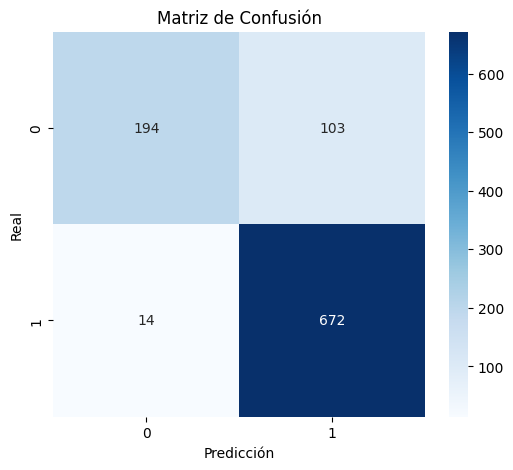

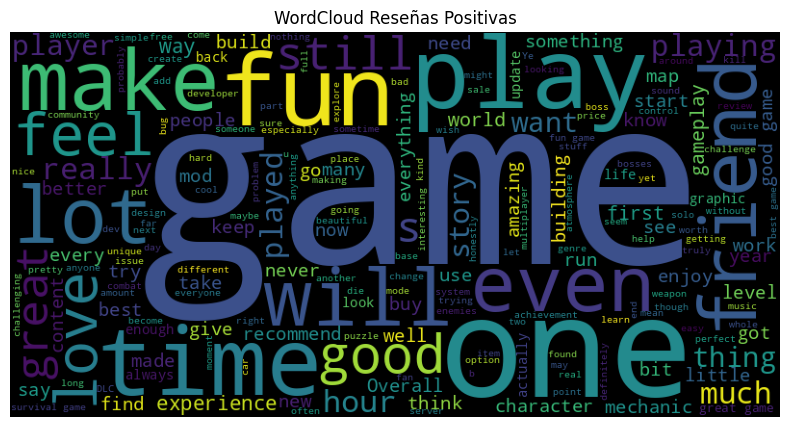

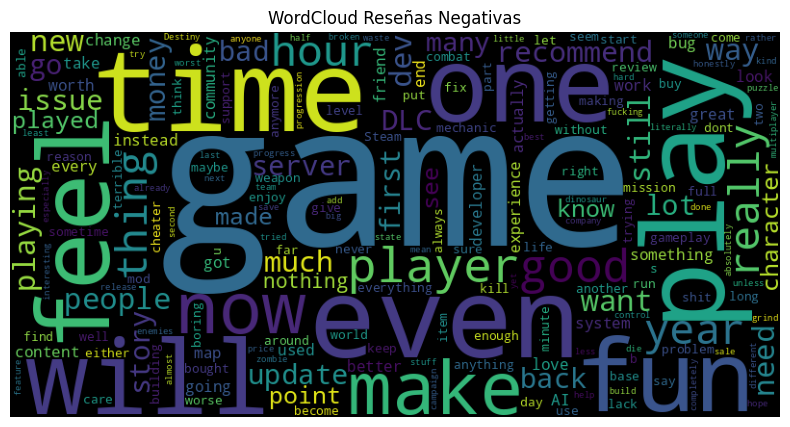

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Filtrado recomendado ---
df = df_reviews_total.copy()

df = df[df["review"].str.len() > 20]
df = df[df["steam_purchase"] == True]

# Convert 'weighted_vote_score' to numeric, coercing errors to NaN
df["weighted_vote_score"] = pd.to_numeric(df["weighted_vote_score"], errors='coerce')
# Now filter out NaNs and then apply the condition
df = df.dropna(subset=["weighted_vote_score"])
df = df[df["weighted_vote_score"] > 0]

X = df["review"]
y = df["voted_up"].astype(int)

# --- 2. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 3. TF-IDF ---
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=20000,
    ngram_range=(1, 2)
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# --- 4. Modelo ---
model = LogisticRegression(max_iter=500)
model.fit(X_train_tfidf, y_train)

# --- 5. Predicciones ---
y_pred = model.predict(X_test_tfidf)

# --- 6. Métricas ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# --- 7. Matriz de confusión ---
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# --- 8. WordCloud Positivo ---
positive_reviews = " ".join(df[df["voted_up"]==1]["review"])
wordcloud_pos = WordCloud(width=800, height=400).generate(positive_reviews)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.title("WordCloud Reseñas Positivas")
plt.show()

# --- 9. WordCloud Negativo ---
negative_reviews = " ".join(df[df["voted_up"]==0]["review"])
wordcloud_neg = WordCloud(width=800, height=400).generate(negative_reviews)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.title("WordCloud Reseñas Negativas")
plt.show()

#**Conclusión final**

Los datos gráficos muestran que los títulos con alta expectativa o fuerte interés inicial suelen alcanzar un buen rendimiento en su lanzamiento. Sin embargo, su permanencia en el tiempo depende de la capacidad del juego para mantener ese interés más allá del estreno.

Por otra parte, los modelos de aprendizaje —tras las revisiones y ajustes realizados— permiten extraer dos conclusiones principales.

1. **Primero**, que las reseñas, tanto positivas como negativas, son el factor más determinante para entender la valoración de un juego, lo cual resulta lógico al tratarse de la principal herramienta mediante la cual los usuarios expresan su experiencia.

2. **Segundo**, que este tipo de análisis presenta un grado considerable de variabilidad y sesgo, algo natural en un medio que combina datos objetivos con percepciones subjetivas.

>Los videojuegos, como forma de expresión y producto cultural, poseen una dimensión artística que introduce inevitablemente subjetividad. Aun así, investigaciones como esta permiten construir hipótesis con un margen aceptable de error y aportan información útil para comprender qué aspectos valoran los jugadores. Esto, a su vez, puede orientar mejor el desarrollo de futuros videojuegos y apoyar la toma de decisiones dentro de la industria.

